<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#create-a-dataset-with-two-stars-at-the-end-of-both-entities" data-toc-modified-id="create-a-dataset-with-two-stars-at-the-end-of-both-entities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>create a dataset with two stars at the end of both entities</a></span></li><li><span><a href="#Create-a-dataset-with-a-star-at-the-end-of-first-entity" data-toc-modified-id="Create-a-dataset-with-a-star-at-the-end-of-first-entity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a dataset with a star at the end of first entity</a></span></li><li><span><a href="#Read-translated-datasets-in-German" data-toc-modified-id="Read-translated-datasets-in-German-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read translated datasets in German</a></span></li><li><span><a href="#Process-translated-german-sentences" data-toc-modified-id="Process-translated-german-sentences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Process translated german sentences</a></span></li><li><span><a href="#create-dictionary-of-label-pairs" data-toc-modified-id="create-dictionary-of-label-pairs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>create dictionary of label pairs</a></span></li><li><span><a href="#Filter" data-toc-modified-id="Filter-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Filter</a></span></li><li><span><a href="#Distribution-of-relationship-types" data-toc-modified-id="Distribution-of-relationship-types-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Distribution of relationship types</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
with open('data/semeval/train_file.txt') as f: 
    eng_small = f.readlines()

In [3]:
sentences_raw = eng_small[::4] # get strings with sentences
labels = eng_small[1::4] # get labels
sentences_ent = [re.findall(r'(?<=\t")(.*)(?="\n)', string)[0] for string in sentences_raw] # extract sentences

In [4]:
def extract_entities(lst_with_tags): 
    e1_de = [re.findall(r'(?<=<e1>)(.*)(?=</e1>)', string) for string in lst_with_tags] # get entity 1
    e2_de = [re.findall(r'(?<=<e2>)(.*)(?=</e2>)', string) for string in lst_with_tags] # get entity 2
    return e1_de, e2_de

In [5]:
# preprocess English dataset
sentences_ent = [string.rstrip() for string in sentences_ent] # extract sentences
e1, e2 = extract_entities(sentences_ent)

### create a dataset with two stars at the end of both entities 

In [6]:
# replace entity markers with stars for correct translation
sentences_ = [re.sub(r'<e1>',"",st) for st in sentences_ent] 
sentences_ = [re.sub(r'<e2>',"",st) for st in sentences_] 
sentences_ = [re.sub(r'</e1>',"*",st) for st in sentences_]
sentences_ = [re.sub(r'</e2>','*',st) for st in sentences_] 

In [7]:
# save redacted sentences
with open('data/semeval_de_new/train_sentences_en_stars.txt', 'w') as f: 
    f.writelines(line + '\n' for line in sentences_)

### Create a dataset with a star at the end of first entity

In [8]:
# replace entity markers with stars for correct translation
sentences_1 = [re.sub(r'<e1>',"",st) for st in sentences_ent] 
sentences_1 = [re.sub(r'<e2>',"",st) for st in sentences_1] 
sentences_1 = [re.sub(r'</e1>',"*",st) for st in sentences_1]
sentences_1 = [re.sub(r'</e2>','',st) for st in sentences_1]

In [9]:
# save redacted sentences
with open('data/semeval_de_new/train_sentences_en_star1.txt', 'w') as f: 
    f.writelines(line + '\n' for line in sentences_1)

### Read translated datasets in German 

**Note**: This part should be replaced with working API for DeepL translations. However, the API is not freely available, therefore this step is currently done manually. 

In [6]:
# read translated sentences in German (2stars)
with open('data/semeval_de_new/train_sentences_de_stars.txt', 'r', encoding = 'utf-8') as f: 
    de_small = f.readlines()

# read translated sentences in German (1star)
with open('data/semeval_de_new/train_sentences_de_star1.txt', 'r', encoding = 'utf-8') as f: 
    de_small1 = f.readlines()

### Process translated german sentences 

In [7]:
# replace * with entity end tags

def return_entity_tags(lst_with_stars):
    
    sentences_de = []

    for i, sent_de in enumerate(lst_with_stars): 

        sent = sent_de.rstrip()
        # delete special quotation marks
        sent = re.sub(r'\"', "", sent)
        # add a space at the beginning of each sentence
        sent = re.sub(r'^', ' ', sent)

        #replace e1
        sent = re.sub(r'\*',"</e1>",sent, 1)
        sent = re.sub(r'[ ](?=[a-zA-Z\u00C0-\u017F\'-\/0-9\&]+<\/e1>)', ' <e1>', sent)

        #replace e2
        sent = re.sub(r'\*',"</e2>",sent)
        sent = re.sub(r'[ ](?=[a-zA-Z\u00C0-\u017F\'-\/0-9\&]+<\/e2>)', ' <e2>', sent)

        sentences_de.append(sent)
        
    return sentences_de

In [8]:
sentences_de = return_entity_tags(de_small) # with stars at the end of both entities
sentences_de1 = return_entity_tags(de_small1) # with one star for 1st entity 

In [9]:
#test
for i, sent in enumerate(sentences_de):
    print(i,sent)

0  Das oben beschriebene System findet seine größte Anwendung in einer <e1>Gruppenanordnung</e1> von <e2>Antennenelementen</e2>.
1  Das <e1>Kind</e1> wurde sorgfältig eingewickelt und mit Hilfe einer Kordel in die <e2>Wiege</e2> gebunden.
2  Der <e1>Autor</e1> eines Keygens verwendet einen <e2>Disassembler</e2>, um sich den rohen Assemblercode anzusehen.
3  Ein nebliger <e1>Grat</e1> erhebt sich von der <e2>Brandung</e2>.
4  Die <e1>studentische</e1> <e2>Vereinigung</e2> ist die Stimme der Studenten der State University of New York at Buffalo.
5  Dies ist der sich ausbreitende <e1>Komplex</e1>, der Perus größter <e2>Silberproduzent</e2> ist.
6  Gegenwärtig ist man der Ansicht, dass die chronische <e1>Entzündung</e1> im distalen Teil des Magens, die durch eine Helicobacter <e2>pylori-Infektion</e2> verursacht wird, zu einer erhöhten Säureproduktion aus der nicht infizierten oberen Korpusregion des Magens führt.
7  Die <e1>Menschen</e1> sind wieder in die Innenstadt <e2>gezogen</e2>.
8  

968  Der resultierende <e1>Biofilm</e1> wächst von <e2>innen</e2> nach außen, anstatt dass sich planktonische Organismen von außen anlagern und das Wachstum von außen fördern.
969  Die <e1>Vibrationen</e1> eines schweren <e2>Güterzuges</e2> der Metropolitan Railway, die unter dem Ausstellungsgelände verkehrt, hatten die Figur aus dem Gleichgewicht gebracht.
970  Das andere <e1>Angebot</e1> kam von einer <e2>Investment-Consulting-Fondsgesellschaft</e2> alter Prägung in New York.
971  Eine ähnliche <e1>Bildsuchfunktion</e1> wurde der <e2>Software</e2> hinzugefügt.
972  Es gibt auch einen Teil der Geschichte hinter der <e1>Bildung</e1> von Wolfs <e2>Dragonern</e2> und einige der Schlachten und Feldzüge, die das Söldnerregiment gekämpft hat.
973  Der <e1>Rumpf</e1> des <e2>Bootes</e2> ist aus einem einzigen Stück Holz geschnitzt.
974  Ein <e1>Metallwürfel</e1>, ein Meter auf jeder Seite, ist von einem wärmeisolierenden <e2>Mantel</e2> umgeben.
975  <e1>Spannungsstöße</e1> oder -spitzen wer

1718  Sumatera (Yagasu) erzielte einen <e1>Gewinn</e1> aus dem <e2>Verkauf</e2> der handwerklichen Aktivitäten von Frauengruppen.
1719  <e1>Wissenschaftler</e1> haben die erste globale geologische <e2>Karte</e2> des größten Mondes des Sonnensystems erstellt - und dabei neue Beweise für die Entstehung des großen, eisigen Satelliten gesammelt.
1720  Lamberts <e1>Kriegserlebnisse</e1> wurden in seinen ausgezeichneten <e2>Memoiren</e2> von 1973 geschildert.
1721  Das korrekte <e1>Zielsignal</e1> wird in die <e2>Peroxisomen</e2> importiert.
1722  Das ultimative D.C.-bezogene Werk der letzten Jahrzehnte zu diesem Thema ist vielleicht Jerzy Kosinskis satirische Being There, die Inspiration für einen Peter <e1>Sellers-Film</e1> gleichen <e2>Namens</e2>.
1723  In den älteren <e1>Stadtteilen</e1> der <e2>Stadt</e2> wird die Straße vor dem eigenen Haus als Verantwortung der Person angesehen, sie wird als Erweiterung ihres Hauses betrachtet.
1724  In einigen der anderen Geschichten läuft ein <e1>W

2467  Diese <e1>Zeilen</e1> aus der Feder des <e2>Dichters</e2> Rupchand Pakshi aus dem 19. Jahrhundert beschreiben die Stadt Kalkutta als eine Stadt der Maschinen.
2468  Es scheint wirklich schlimm zu sein, wenn eine <e1>Armee</e1> von <e2>Raupen</e2> einen Obstbaum befällt.
2469  Die <e1>Fluktuationen</e1> werden durch Staats- und <e2>Bundessteuern</e2>, die Entfernung von Raffinerien zu Tankstellen und Umweltgesetze verursacht.
2470  Ich habe gerade ein neu veröffentlichtes <e1>Buch</e1> von einem alten <e2>Freund</e2> von mir, Gordon Goldstein, per Post erhalten.
2471  Die <e1>Bilanzen</e1> wurden korrekt in die <e2>Kleinunternehmer-Buchhaltung</e2> importiert.
2472  Eine inoffizielle technische <e1>Information</e1> ist der Öffentlichkeit zugespielt <e2>worden</e2>.
2473  <e1>Tollwut</e1> wird durch ein <e2>Virus</e2> verursacht, das normalerweise durch den Speichel eines infizierten Tieres übertragen wird.
2474  Der <e1>Wäschekorb</e1> war voll mit hochwertigen süßen <e2>Keksen</e

3217  Jeder <e1>Student</e1> ist Teilnehmer an einer <e2>Webkonferenzsitzung</e2>.
3218  Ein Teil der äußeren <e1>Isolierung</e1> des <e2>Ethernetkabels</e2> befindet sich ebenfalls im Stecker.
3219  Der <e1>Schlüssel</e1> war in einem <e2>Pflanzgefäß</e2>, das wir in der Nähe der Tür hängen hatten.
3220  Rund um den Globus sind einzigartige und faszinierende Arten vom <e1>Aussterben</e1> durch die <e2>Jagd</e2> und die Zerstörung ihres Lebensraums bedroht, was sich auf gefährdete Tiere in jeder Art von Umwelt auswirkt.
3221  Die meisten <e1>Menschen</e1> sind mit <e2>Angstgefühlen</e2> vertraut.
3222  Die <e1>Nagelpistole</e1> treibt den <e2>Nagel</e2> mit einem einzigen schnellen Schlag ein, so dass durch die Reibung zwischen dem Nagel und dem Holz Wärme erzeugt wird.
3223  Als er über seine Optionen nachdachte, öffnete sich die <e1>Haustür</e1> des <e2>Häuschens</e2> und jemand trat heraus.
3224  Das <e1>Buch</e1> bezieht den Leser in viele andere <e2>Themen</e2> ein, die für alle v

4001  Der Molotowcocktail ist eine <e1>Flasche</e1> mit <e2>Benzin</e2> darin, die oben ein feuchtes Tuch hat, das als Docht dient.
4002  Ankerschrauben für <e1>Bremskabel</e1> sind die wichtigsten Befestigungselemente an einem Fahrrad.
4003  Das <e1>Weingut</e1> umfasst <e2>Gärten</e2>.
4004  Mit dem <e1>Daumen</e1> der <e2>Hand</e2>, die den Kopf hält, zieht er das untere Augenlid nach unten, um einen Beutel zu bilden.
4005  Die <e1>Leser</e1> konzentrieren sich auf den <e2>Inhalt</e2>, statt sich um die Worte zu bemühen.
4006  Die <e1>Inspiration</e1> für die Multi-Touch-Technologie kam von einer dezidiert nicht-digitalen <e2>Veranstaltung</e2>.
4007  Das äußere <e1>Ohr</e1> umfasst auch den <e2>Gehörgang</e2>, in dem das Ohrenschmalz produziert wird.
4008  Kratzen Sie am <e1>Stamm</e1> dieses <e2>Baumes</e2> und ein würzig-süßes Aroma kommt zum Vorschein.
4009  Die öffentliche <e1>Debatte</e1> wirbelt über den <e2>Zweck</e2> und die Ziele der Wissenschaft.
4010  Es war wie ein Spie

4966  Das <e1>Orchester</e1> befand sich in einer <e2>Box</e2> über der Bühne.
4967  Er hat die <e1>Beiträge</e1> in chronologische <e2>Reihenfolge</e2> gebracht.
4968  Sie sind der größte <e1>Haufen</e1> von <e2>Heulsusen</e2>, mit denen ich in meinen 30 Jahren in Washington zu tun hatte.
4969  Weil wir Beobachtungen gemacht haben, kennen wir das Schicksal der <e1>Katze</e1> in der <e2>Box</e2>.
4970  Ich habe meine <e1>Türklinke</e1> entfernt und wieder eingebaut, nur um zu sehen, ob das alles auch außerhalb der Tür möglich ist.
4971  Andere <e1>Unternehmen</e1> konkurrieren mit uns, indem sie ihre eigenen <e2>Technologien</e2> erfinden.
4972  Das TGMC ist ein öffentliches, gemeinnütziges integriertes <e1>Gesundheitssystem</e1>, das aus einer <e2>Akutpflegeeinrichtung</e2> mit 299 lizenzierten Betten besteht, die eine Reihe von Dienstleistungen wie Rehabilitations- und Fachpflegeeinheiten, ein Zentrum für ambulante Chirurgie, Notfallversorgungsdienste, Primärversorgungsdienste und ei

5716  Während die geschwungene Form der sanften <e1>Wellung</e1> von <e2>Sanddünen</e2> ähnelt, setzen zwei erhabene Seesterne Akzente in der Bordüre.
5717  Wenn eine Taste gedrückt wird und der Schaltkreis abgeschlossen ist, wird der erzeugte Code entweder über ein <e1>Tastatur</e1>-Kabel</e2> (unter Verwendung von elektrischen Ein-/Aus-Impulsen zur Darstellung von Bits) oder über eine drahtlose Verbindung an den Computer gesendet.
5718  Eine geöffnete Datei wird im Linux-Kernel durch ein struct-Datei-Element beschrieben; die <e1>structure</e1> umschließt einen <e2>Zeiger</e2> auf die Inode, die die Datei repräsentiert.
5719  Rabbi wurde von einer schweren Darmkrankheit geheilt, indem er siebzig Jahre alten <e1>Apfelwein</e1> trank, von dem ein Nichtjude 300 Fässer aufbewahrt hatte ('Ab. Zarah 40b).
5720  Ein Teil des <e1>Problems</e1> ist in einem schlecht durchdachten <e2>Staatsgesetz</e2> verwurzelt.
5721  In den 1950er Jahren wurden mehrere <e1>Bücher</e1> zum Thema <e2>Soziometri

6466  Dieses <e1>Dokument</e1> leistet einen wesentlichen Beitrag zur weiteren <e2>Klärung</e2> des Zugangs zu Trinkwasser als Menschenrecht.
6467  Am folgenden Tag wurde der <e1>Wärmetauscher</e1> in den <e2>Kraftstofftank</e2> eingebaut.
6468  Systemisch verursachen Staub und <e1>Rauch</e1> Reizungen der oberen Atemwege, Metallgeschmack und <e2>Übelkeit</e2>.
6469  Ich erwachte und fand eine <e1>Konjunktion</e1> von <e2>Grammatikern</e2>, die über mir standen und meine Veranlagung mit einem Blick beobachteten, der ein Hohn über Butler beschämen würde.
6470  Die <e1>Disc</e1> in einer <e2>Plattenspieldose</e2> spielt diese Funktion ab, wobei die Stifte senkrecht zur ebenen Oberfläche stehen.
6471  Die <e1>Schale</e1> der <e2>Orange</e2> hat mehrere Vorteile, die Sie nutzen können: Seine äußere Haut enthält Flavonoide, einen wertvollen Bestandteil von Vitamin C.
6472  Der <e1>Staub</e1>, der Lärm und der Schlafentzug, die durch den <e2>Bau</e2> entstehen, sind unerträglich.
6473  Mein 

7216  Fruchtsaft enthält den gesamten <e1>Frucht</e1> <e2>Zucker</e2> und keinen der Fruchtfasern und nur einige der Fruchtnährstoffe.
7217  Die <e1>Schachtel</e1> enthält drei steife <e2>Pappröhren</e2>, die jeweils in jetzt zerfallendes Zellophan eingewickelt sind.
7218  Bis 1729 enthielt das <e1>Gebäude</e1> nur das <e2>Gymnasium</e2>.
7219  Dieser <e1>Schritt</e1> macht Chinas langjährigen Widerstand gegen solche Fähigkeiten in den Händen anderer Mächte zum <e2>Gespött</e2>.
7220  Plötzlich kam ein Mann aus dem Nichts auf mich zu und hielt mir eine <e1>Tüte</e1> mit Süßigkeiten ins <e2>Gesicht</e2>.
7221  Er fuhr fort, die <e1>Theorie</e1> aus der Perspektive der <e2>Risikobewertung</e2> zu untersuchen.
7222  Die <e1>Gerichte</e1> schufen den <e2>Freeman-Walter-Abele-Test</e2>, um festzustellen, ob ein Algorithmus nur eine abstrakte Idee darstellt.
7223  Es war das einzige Mal, dass der <e1>Präsident</e1> während seiner sechsjährigen Amtszeit den <e2>Vetostift</e2> in die Hand geno

In [11]:
e1_de, e2_de = extract_entities(sentences_de)
e1_de1, e2_de1 = extract_entities(sentences_de1)

In [12]:
e1_missing = []
for i, word in enumerate(e1_de): 
    if len(word) == 0: 
        e1_missing.append(i)
        print(sentences_de[i])

 Als Nächstes folgte der Aufstieg, ein langsamer, stetiger Felsen, der von hohen Bäumen und roten Felsen reflektiert wurde.
 Generalsekretär Jiang Zemin verkostet den von der örtlichen Tu-Minderheit angebotenen Gerstenlikör Huzhu Brand </e1> und bewertet den Likör hoch.
 Als Nächstes hielten wir an einem Tisch aus Kiefernholz, an dem ein Arrangement kobaltblauer Strickschalen </e1> von einem südafrikanischen <e2>Keramiker</e2> einen ordentlichen Stapel schicker indigoblauer Jeanshosen von Londons Made in Heaven ergänzte.


In [13]:
e2_missing = []
for i, word in enumerate(e2_de): 
    if len(word) == 0: 
        e2_missing.append(i)

In [14]:
len(e1_missing), len(e2_missing)

(3, 446)

In [15]:
e1_missing

[986, 2870, 5715]

In [16]:
#compare e2 from the first list with e1 from first to identify changed labels
changed_labels = [i for i in range(len(e2_de)) if (e2_de[i] == e1_de1[i])&(labels[i]!='Other\n')]

In [17]:
len(changed_labels)

233

In [18]:
# test
for i in changed_labels: 
    print(i, 
          labels[i],
          sentences_ent[i], 
          de_small[i]
         )

10 Member-Collection(e1,e2)
 The fifty <e1>essays</e1> collected in this <e2>volume</e2> testify to most of the prominent themes from Professor Quispel's scholarly career. Die fünfzig in diesem Band* versammelten Essays* bezeugen die meisten der herausragenden Themen aus Professor Quispels wissenschaftlicher Laufbahn.

75 Cause-Effect(e2,e1)
 The <e1>suffering</e1> caused by the <e2>terrorists</e2> is the real torture. Das von den Terroristen* verursachte Leid* ist die eigentliche Folter.

78 Cause-Effect(e2,e1)
 In a poetic twist, the <e1>tsunami</e1> triggered by the rock <e2>band</e2> forced many American jazz and blues singers to seek work in the United Kingdom, which is where Anderson found a receptive audience in 1965. In einer poetischen Wendung zwang der von der Rockband* ausgelöste Tsunami* viele amerikanische Jazz- und Bluessänger, in Großbritannien Arbeit zu suchen, wo Anderson 1965 ein aufgeschlossenes Publikum fand.

87 Cause-Effect(e2,e1)
 Historical view of the <e1>damag

### create dictionary of label pairs

In [19]:
opp_dir_rel = {'Cause-Effect(e1,e2)\n': 'Cause-Effect(e2,e1)\n', 
                 'Cause-Effect(e2,e1)\n': 'Cause-Effect(e1,e2)\n',
                 'Component-Whole(e1,e2)\n': 'Component-Whole(e2,e1)\n', 
                 'Component-Whole(e2,e1)\n': 'Component-Whole(e1,e2)\n', 
                 'Content-Container(e1,e2)\n': 'Content-Container(e2,e1)\n', 
                 'Content-Container(e2,e1)\n': 'Content-Container(e1,e2)\n',
                 'Entity-Destination(e1,e2)\n': 'Entity-Destination(e2,e1)\n', 
                 'Entity-Destination(e2,e1)\n': 'Entity-Destination(e1,e2)\n',
                 'Entity-Origin(e1,e2)\n': 'Entity-Origin(e2,e1)\n', 
                 'Entity-Origin(e2,e1)\n': 'Entity-Origin(e1,e2)\n',
                 'Instrument-Agency(e1,e2)\n': 'Instrument-Agency(e2,e1)\n', 
                 'Instrument-Agency(e2,e1)\n': 'Instrument-Agency(e1,e2)\n',
                 'Member-Collection(e1,e2)\n': 'Member-Collection(e2,e1)\n', 
                 'Member-Collection(e2,e1)\n': 'Member-Collection(e1,e2)\n',
                 'Message-Topic(e1,e2)\n': 'Message-Topic(e2,e1)\n', 
                 'Message-Topic(e2,e1)\n': 'Message-Topic(e1,e2)\n',
                 'Product-Producer(e1,e2)\n': 'Product-Producer(e2,e1)\n', 
                 'Product-Producer(e2,e1)\n': 'Product-Producer(e1,e2)\n',
                 'Other\n': 'Other\n'
                }

In [20]:
labels_new = labels
for i in changed_labels: 
    labels_new[i] = opp_dir_rel[labels_new[i]]

### Filter 

In [21]:
sentences_de_final = [sentences_de[i] for i in range(len(sentences_de)) if i not in e2_missing]
labels_de_final = [labels_new[i] for i in range(len(sentences_de)) if i not in e2_missing]

In [22]:
len(sentences_de_final), len(labels_de_final)

(7554, 7554)

In [23]:
combined = [str(str(i)
                +'   "'
                +sentences_de_final[i]
                +'"'
                +'\n'
                +labels_de_final[i]
                +'Comment: \n'
                +'\n'
               ) 
            for i in range(len(sentences_de_final))]

In [27]:
# save redacted sentences
with open('data/semeval_de_new/final/train_file_de_final.txt', 'w', encoding = 'utf-8') as f: 
    f.writelines(line for line in combined)

In [31]:
7700/32

240.625

### Distribution of relationship types

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

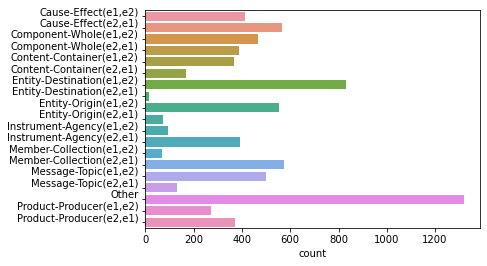

In [30]:
labels_train = sorted(labels_de_final)
sns.countplot(y = labels_train)
plt.show()

In [31]:
len(labels), len(labels_train)

(8000, 7554)

In [32]:
mult_labels = labels+labels_train

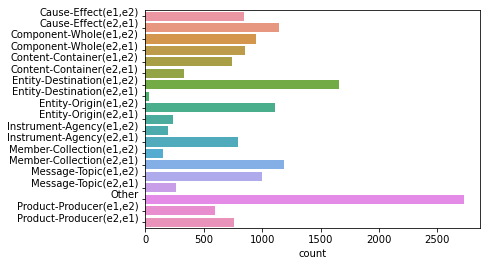

In [33]:
labels_mult = sorted(mult_labels)
sns.countplot(y = labels_mult)
plt.show()

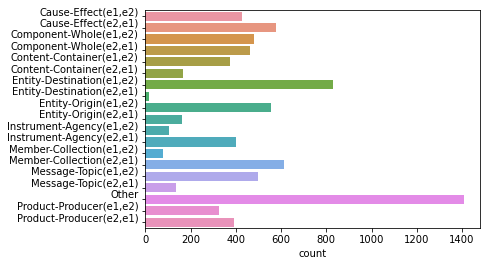

In [34]:
labels_sort = sorted(labels)
sns.countplot(y = labels_sort)
plt.show()